# Exploratory Data Analysis

Now that I have created my initial dataset, it is time to do some data exploration.

The questions I want explore for this project are:
1. **What is the age that a person is at their physical peak?**
    - I will explore the data and create visualisations to use in my presentation.
2. **What sport would a person be best at based on their natural attributes?**
    - I will create a model (in another file) to answer this question based on the athletes' attributes.
    - I will make changes to the dataset so that there are more features for my model (currently there is only age, height, weight).

## Initial Exploration

In [12]:
## Firstly import relevant libraries for exploring data
# For data usage
import pandas as pd
import numpy as np

# For visualisations
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
# Import the initial dataset we created before
df = pd.read_csv('Olympic Athlete Complete Data.csv')

In [18]:
# For some reason there is now an extra index column, so remove this
df = df.drop(columns = ['Unnamed: 0'])

In [22]:
# Let's look at the statistics of the numerical columns
df.describe()

,athlete_id,height_cm,weight_kg,age,year,position
count,237781.000000,184509.000000,177203.000000,237781.000000,237781.000000,220096.000000
mean,63792.221620,175.573457,70.582851,25.996027,1979.226616,15.410666
std,41002.059643,10.873707,14.649773,6.097541,31.401223,19.676994
min,1.000000,127.000000,25.000000,10.581793,1896.000000,1.000000
25%,29757.000000,168.000000,60.000000,21.924709,1960.000000,4.000000
50%,55629.000000,175.000000,70.000000,25.015743,1988.000000,8.000000
75%,102829.000000,183.000000,79.000000,28.892539,2004.000000,17.000000
max,147804.000000,226.000000,198.000000,72.815880,2020.000000,185.000000


#### Initial information from df.describe()

|       | **mean** | **sd** | **max** | **min** |
|-------|----------|--------|---------|---------|
|**height**| 175.57cm | 10.87cm | 226cm | 127cm |
|**weight**| 70.58kg  | 14.65kg | 198kg | 25kg  |
|**age**   | 26 years | 6.09 years | 72.82 years | 10.58 years |


Average age is 26 years with standard deviation of 6.09 years. So is this the best answer for the physical peak?

No:
- This considers every sport equally which may skew the data (e.g. sports like golf don't require peak physique)
- This dataset goes back the 1896. Sports science has developed since then meaning that the age of physical peak has likely changed.
- Perhaps a human's physical peak also depends on their height?
- Even though athletes represent humans at their physical peak, they'll have their own phyical peak at a certain age.
    - It may be useful to look into the finishing positions of the athletes to see how old the best ones are.
- Also the gender of the athlete may also be a factor. We need to create a new column with the gender of the athlete (use the event column)

Now for some further data exploration.

## Average Age through the years

First let's look at a table containing the average age at each Olympic games

In [28]:
# The overall average age each year overall Olympics
df.groupby('year')[['age']].mean()

,age
year,
1896.0,24.053110
1900.0,28.668393
1904.0,26.878010
1908.0,27.203501
1912.0,27.710894
1920.0,30.075132
1924.0,28.187449
1928.0,26.493334
1932.0,26.024897


Different Olympic games have different sports so the above table isn't fair. We need to look at sports individually. Let's look at the disciplines that require the most athleticism.

According to ChatGPT, five of the top Olympic sports in terms of athleticism and physicality required are:
- Athletics
- Swimming (Aquatics)
- Gymnastics (Artistic)
- Weightlifting
- Boxing

So let's create the table above but separated into these five disciplines.

### Creating a Visualisation for the Average Age of 5 Physical Sports each year

- First put the information into a dataframe by creating a column for each sport.
- Second use seaborn to display the information on a lineplot.

In [37]:
# Average age by year for athletics
athletics = df[df.discipline == 'Athletics'].groupby('year')['age'].mean()

In [39]:
# Average age by year for Swimming (Aquatics)
swimming = df[df.discipline == 'Swimming (Aquatics)'].groupby('year')['age'].mean()

In [41]:
# Average age by year for Artistic Gymnastics (Gymnastics)
gymnastics = df[df.discipline == 'Artistic Gymnastics (Gymnastics)'].groupby('year')['age'].mean()

In [43]:
# Average age by year for Weightlifting
weightlifting = df[df.discipline == 'Weightlifting'].groupby('year')['age'].mean()

In [45]:
# Average age by year for Boxing
boxing = df[df.discipline == 'Boxing'].groupby('year')['age'].mean()

In [51]:
# Combining each of the new columns above into a dataframe
df_age = pd.DataFrame(data = {'athletics': athletics,
                              'swimming' : swimming, 
                              'gymnastics' : gymnastics,
                              'weightlifting' : weightlifting,
                              'boxing' : boxing})

In [53]:
## Creating an Olympic Colour Palette (these are the exact olympic colour codes)
# Also create a palette without black because black doesn't work in boxplots (which I will use later)
olympic_palette = sns.color_palette(['#0081C8', '#FCB131', '#000000', '#00A651', '#EE334E'])
no_black_palette = sns.color_palette(['#0081C8', '#FCB131', '#00A651', '#EE334E'])

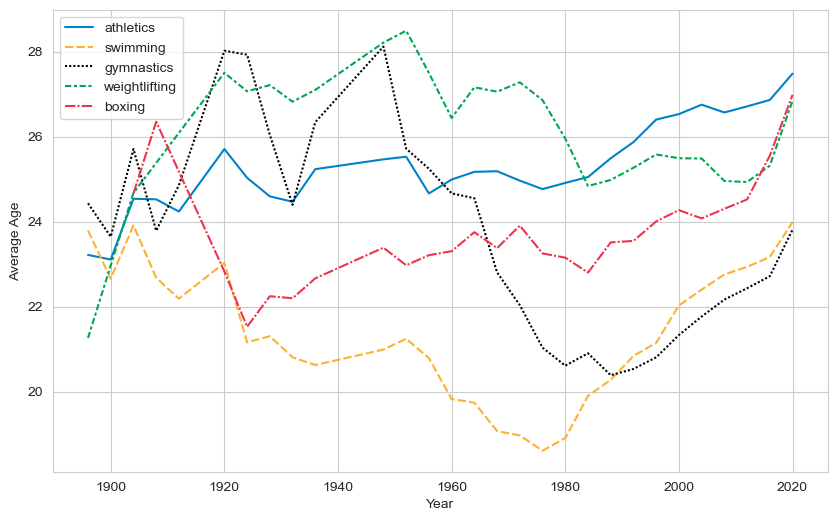

In [55]:
# Plot the average age of the five sports by year of Olympics
plt.figure(figsize = (10,6))        # Figure size
sns.set_style(style = 'whitegrid')  # Background grid makes it look more clear
sns.lineplot(data = df_age,                # The dataset I have just created
             palette = olympic_palette)    # Use the Olympic colour palette

# Axis labels
plt.xlabel('Year')
plt.ylabel('Average Age')

plt.savefig('Average age through the years')   # Save the visualisation to use in my presentation.
plt.show()

**Notes:**

Overall the average age fluctuates massively between 1896 and 2020 in every discipline.

Notice that since around 1980s, the general trend is an upward trajectory in average age for every sport.
- I think this may be to do with the developments in technology and data analytics in recent history, meaning that new research in sports science has gradually made the peak physical age increase.
- This also means that we should focus on the most recent Olympic games and ignore data from a long time ago.

Also notice that the average age differs between disciplines, this is important to note.

## Making changes to the dataframe

I want the updated dataframe to contain:

1. Only the events and disciplines that were in the 2020 Olympics.
2. A gender column (I will need to use the event names to create this column).
3. A new 'age_rounded' column that rounds the athletes age down to the whole year (this will be useful for visualisations).
4. Creating a column that separates Olympic sports into physical and non-physical sports.
5. Creating a column that separates Olympic sports into team and individual sports.

The updated dataframe containing this information will be ```df2```.

### 1. 2020 Events and Disciplines only

In [64]:
# I want to narrow the dataframe down to only disciplines and events from 2020 Olympics
events_2020 = df[df.year == 2020].event.unique().tolist()
disciplines_2020 = df[df.year == 2020].discipline.unique().tolist()

In [66]:
# Creating a new dataframe that only contains disciplines and events from 2020
# (note that this does NOT mean that the data in this dataframe is only about athletes from 2020)
df2 = df[(df.event.isin(events_2020)) & (df.discipline.isin(disciplines_2020))]

### 2. Creating a Gender column

The majority of the event names contain either the word 'Men' or 'Women' to distinguish who is participating. I will use this information to create the new gender column.

In [77]:
# Number of Events Total 2020
len(df2.event.unique())

292

In [79]:
# Number of Female Events 2020
len(df2[df2.event.str.contains('Women')].event.unique())

135

In [81]:
# Number of Male Events 2020
len(df2[df2.event.str.contains('Men')].event.unique())

144

In [83]:
# Number of Mixed Events 2020
len(df2[df2.event.str.contains('Mixed')].event.unique())

9

In [85]:
# Events that don't specify 'Men', 'Women', or 'Mixed' 2020
df2[(df2.event.str.contains('Men') == False) & 
    (df2.event.str.contains('Women') == False) &
    (df2.event.str.contains('Mixed') == False)]['event'].unique().tolist()

['Individual, Open (Olympic)',
 'Team, Open (Olympic)',
 'Cycling Road (Cycling)',
 'Marathon Swimming (Aquatics)']

There are 292 unique events:
- 135 contain the word 'Women'
- 144 contain the word 'Men'
- 9 contain the word 'Mixed'
- 4 others.

So there are 13 events to remove before adding the gender column.

In [87]:
# Remove events that don't specify 'Men' or 'Women'
df2 = df2[(df2.event.str.contains('Men')) | (df2.event.str.contains('Women'))].reset_index(drop = True)

In [89]:
# Check to make sure no event contains both the words Men and Women
len(df2[(df2.event.str.contains('Men')) & (df2.event.str.contains('Women'))])

0

In [91]:
# Check to make sure all the events left in df2 contain either the word 'Men' or 'Women'
len(df2) - len(df2[df2.event.str.contains('Men')]) - len(df2[df2.event.str.contains('Women')])

0

The gender column will be called ```male``` have boolean data type:

- ```True``` for male athletes,
- ```False``` for female athletes.

In [93]:
# Now that all events either contain 'Men' or 'Women' we can add a boolean column to df2 for this information
df2['male'] = df2.event.str.contains('Men')

In [95]:
# New column created that shows whether or not an athlete is male
df2.head()

,athlete_id,name,height_cm,weight_kg,born_date,age,country_name,country_code,born_city,born_region,born_country,year,olympics_date,discipline,event,position,tied,medal,male
0,1,Jean-François Blanchy,NaN,NaN,1886-12-12,25.563313,France,FRA,Bordeaux,Gironde,FRA,1912.0,1912-07-06,Tennis,"Singles, Men (Olympic)",17.0,True,NaN,True
1,1,Jean-François Blanchy,NaN,NaN,1886-12-12,25.563313,France,FRA,Bordeaux,Gironde,FRA,1912.0,1912-07-06,Tennis,"Doubles, Men (Olympic)",NaN,False,NaN,True
2,1,Jean-François Blanchy,NaN,NaN,1886-12-12,33.670089,France,FRA,Bordeaux,Gironde,FRA,1920.0,1920-08-14,Tennis,"Singles, Men (Olympic)",32.0,True,NaN,True
3,1,Jean-François Blanchy,NaN,NaN,1886-12-12,33.670089,France,FRA,Bordeaux,Gironde,FRA,1920.0,1920-08-14,Tennis,"Doubles, Men (Olympic)",4.0,False,NaN,True
4,2,Arnaud Boetsch,183.0,76.0,1969-04-01,27.299110,France,FRA,Meulan,Yvelines,FRA,1996.0,1996-07-19,Tennis,"Singles, Men (Olympic)",17.0,True,NaN,True


In [97]:
# Proportion of male to female overall
df2.groupby('male')['male'].count()

male
False     63161
True     138059
Name: male, dtype: int64

In [99]:
# Proportion of male to female 2020
df2[df2.year >= 2000].groupby('male')['male'].count()

male
False    34196
True     41217
Name: male, dtype: int64

### 3. Age_rounded column
Create a new 'age_rounded' column that rounds every age DOWN to the nearest year.

In [103]:
# Create a new column with the ages ROUNDED DOWN to the whole year, (i.e. the normal way of defining age)
df2['age_rounded'] = df2.age//1

### 4. Adding a column to tell whether a discipline is 'physical'

With the help of chatgpt I sorted the disciplines that require more of a specialised skill and don't require as much athleticism and physicality with the disciplines that do require more athleticism and physicality.

In [78]:
# Initial list with all the 2020 disciplines
array = df2.discipline.unique().tolist()

In [1047]:
# A loop that lets me split the disciplines into ones to keep and ones to remove.
keep = []
remove = []
other = []
print('K = Keep, R = Remove')
for i in array:
    a = input(f'{i}: ')
    if a.lower() == 'k':
        keep.append(i)
    elif a.lower() == 'r':
        remove.append(i)
    else:
        other.append(i)

K = Keep, R = Remove


Tennis:  k
Table Tennis:  r
Fencing:  r
Badminton:  k
Hockey:  k
Athletics:  k
Modern Pentathlon:  k
Archery:  r
Boxing:  k
Softball (Baseball/Softball):  r
Baseball (Baseball/Softball):  r
Sailing:  r
Golf:  r
Basketball (Basketball):  k
Cycling Road (Cycling):  k
Handball:  k
Canoe Sprint (Canoeing):  k
Canoe Slalom (Canoeing):  k
Rowing:  k
Cycling Track (Cycling):  k
Diving (Aquatics):  r
Equestrian Jumping (Equestrian):  r
Equestrian Eventing (Equestrian):  r
Equestrian Dressage (Equestrian):  r
Cycling Mountain Bike (Cycling):  k
Football (Football):  k
Swimming (Aquatics):  k
Artistic Gymnastics (Gymnastics):  k
Rhythmic Gymnastics (Gymnastics):  r
Weightlifting:  k
Judo:  k
Wrestling:  k
Shooting:  r
Water Polo (Aquatics):  k
Artistic Swimming (Aquatics):  r
Triathlon:  k
Beach Volleyball (Volleyball):  k
Volleyball (Volleyball):  r
Cycling BMX Racing (Cycling):  k
Trampolining (Gymnastics):  r
Marathon Swimming (Aquatics):  k
Taekwondo:  k
Skateboarding (Roller Sports):  r
Rug

In [109]:
# The keep disciplines from the loop above
keep = ['Tennis', 'Badminton', 'Hockey', 'Athletics', 'Modern Pentathlon', 'Boxing', 'Basketball (Basketball)',
         'Cycling Road (Cycling)', 'Handball', 'Canoe Sprint (Canoeing)', 'Canoe Slalom (Canoeing)', 'Rowing',
         'Cycling Track (Cycling)', 'Cycling Mountain Bike (Cycling)', 'Football (Football)', 'Swimming (Aquatics)',
         'Artistic Gymnastics (Gymnastics)', 'Weightlifting', 'Judo', 'Wrestling', 'Water Polo (Aquatics)', 'Triathlon',
         'Beach Volleyball (Volleyball)', 'Cycling BMX Racing (Cycling)', 'Marathon Swimming (Aquatics)', 'Taekwondo',
         'Rugby Sevens (Rugby)', 'Karate', 'Sport Climbing', '3x3 Basketball (Basketball)']

In [111]:
# The remove disciplines from the loop above
remove = ['Table Tennis', 'Fencing', 'Archery', 'Softball (Baseball/Softball)', 'Baseball (Baseball/Softball)',
         'Sailing', 'Golf', 'Diving (Aquatics)', 'Equestrian Jumping (Equestrian)', 'Equestrian Eventing (Equestrian)',
         'Equestrian Dressage (Equestrian)', 'Rhythmic Gymnastics (Gymnastics)', 'Shooting', 'Artistic Swimming (Aquatics)',
         'Volleyball (Volleyball)', 'Trampolining (Gymnastics)', 'Skateboarding (Roller Sports)', 'Surfing',
         'Cycling BMX Freestyle (Cycling)']

In [117]:
# Create a new boolean column in df2 to split sports between physical and not physical
df2['physical'] = df2.discipline.isin(keep)

### 5. New column to show if an event is in a team or not

- First split the disciplines into those that are only team and those that aren't only team.
- Then for the disciplines that aren't only team, extract the specific events that are team.

In [92]:
# Initial list with all the disciplines in df_2020
array2 = df_2020.discipline.unique().tolist()

In [ ]:
# A loop that lets me split the disciplines into ones to keep and ones to remove.
keep2 = []
remove2 = []
other2 = []
print('K = Keep, R = Remove')
for i in array2:
    a = input(f'{i}: ')
    if a.lower() == 'k':
        keep2.append(i)
    elif a.lower() == 'r':
        remove2.append(i)
    else:
        other.append(i)

K = Keep, R = Remove


In [133]:
# Disciplines that are not team only
keep2 = ['Table Tennis', 'Archery', 'Fencing', 'Artistic Gymnastics (Gymnastics)', 'Rowing', 'Shooting',
         'Diving (Aquatics)', 'Sailing', 'Athletics', 'Canoe Sprint (Canoeing)', 'Marathon Swimming (Aquatics)',
         'Weightlifting', 'Swimming (Aquatics)', 'Cycling Road (Cycling)', 'Triathlon', 'Judo', 'Cycling Track (Cycling)',
         'Tennis', 'Wrestling', 'Cycling Mountain Bike (Cycling)', 'Boxing', 'Badminton', 'Modern Pentathlon',
         'Canoe Slalom (Canoeing)', 'Trampolining (Gymnastics)', 'Taekwondo', 'Rhythmic Gymnastics (Gymnastics)',
         'Cycling BMX Racing (Cycling)', 'Skateboarding (Roller Sports)', 'Golf', 'Karate', 'Surfing',
         'Cycling BMX Freestyle (Cycling)', 'Sport Climbing']

In [135]:
# Disciplines that ARE team only
remove2 = ['Football (Football)', 'Basketball (Basketball)', 'Beach Volleyball (Volleyball)', 'Handball',
         'Hockey', 'Softball (Baseball/Softball)', 'Volleyball (Volleyball)', 'Water Polo (Aquatics)',
         'Baseball (Baseball/Softball)', 'Artistic Swimming (Aquatics)', 'Rugby Sevens (Rugby)', '3x3 Basketball (Basketball)']

In [137]:
# Dataframe containing all unique events from disciplines that are not team only
extra_df = df2[df2.discipline.isin(keep2)][['discipline',
                                                    'event']].drop_duplicates().sort_values(by='discipline').reset_index(drop = True)

In [139]:
extra_df

,discipline,event
0,Archery,"Individual, Men (Olympic)"
1,Archery,"Individual, Women (Olympic)"
2,Archery,"Team, Women (Olympic)"
3,Archery,"Team, Men (Olympic)"
4,Artistic Gymnastics (Gymnastics),"400 metres, Men (Olympic)"
...,...,...
419,Wrestling,"Light-Heavyweight, Freestyle, Women (Olympic)"
420,Wrestling,"Light-Heavyweight, Greco-Roman, Men (Olympic)"
421,Wrestling,"Lightweight, Freestyle, Women (Olympic)"
422,Wrestling,"Light-Heavyweight, Freestyle, Men (Olympic)"


I explored the new dataframe I created to find words that describe a team event. Then created the following dataframes to separate team events from individual events.

In [141]:
# List of all the other team events
team_events = extra_df[(extra_df.event.str.contains('Double')) |
            (extra_df.event.str.contains('Team')) |
            (extra_df.event.str.contains('Relay')) |
            (extra_df.event.str.contains('Synchronized')) |
            (extra_df.event.str.contains('Fours')) |
            (extra_df.event.str.contains('Two Person')) |
            (extra_df.event.str.contains('Quadruple')) |
            (extra_df.event.str.contains('Eights')) |
            (extra_df.event.str.contains('Group')) |
            (extra_df.event.str.contains('Madison')) |
            (extra_df.event.str.contains('Pairs')) |
            (extra_df.event.str.contains('Skiff'))].event.unique().tolist()

In [143]:
# List of all the individual events
single_events = extra_df[(extra_df.event.str.contains('Double') == False) &
            (extra_df.event.str.contains('Team') == False) &
            (extra_df.event.str.contains('Relay') == False) &
            (extra_df.event.str.contains('Synchronized') == False) &
            (extra_df.event.str.contains('Fours') == False) &
            (extra_df.event.str.contains('Two Person') ==  False) &
            (extra_df.event.str.contains('Quadruple') == False) &
            (extra_df.event.str.contains('Eights') ==  False) &
            (extra_df.event.str.contains('Group') == False) &
            (extra_df.event.str.contains('Madison') == False) &
            (extra_df.event.str.contains('Pairs') == False) &
            (extra_df.event.str.contains('Skiff') == False)].event.unique().tolist()

In [145]:
# Check that all the events are either team or single
len(extra_df.event.unique().tolist()) - len(single_events) - len(team_events)

0

In [147]:
# Add the team column to df2
df2['team'] = (df2.discipline.isin(remove2)) | (df2.event.isin(team_events))

**df2**
- df2 contains a new ```male``` column
- df2 only contains events that existed in the 2020 Olympics (i.e. events that have been dropped from the Olympics before 2020 are no longer part of the data)
- df2 does NOT contain mixed gender events (e.g. Modern-day equestrian, mixed relays)
- df2 contains a new ```physical``` column
- df2 contains a new ```team``` column

## Olympics 2020 Data Analysis

First I will create a dataframe with the data from the 2020 Olympics only, then do some more EDA.

In [161]:
# Create a dataframe with data on only 2020 athletes
df_2020 = df2[df2.year == 2020]

### Age distribution of physical Olympic sports

I will create a visualisation showing the age distribution in 2020 for specific sports.
I will include:
- Physical individual sports (the same 5 physical sports as I used earlier on)
- Physical team sports
- Non-physical sports

I will be able to use this graph to make comparisons between different types of sports.

In [169]:
# Create a list of the sports that I am going to use for my visualisation 
order_sports = ['Artistic Gymnastics (Gymnastics)', 'Football (Football)', 'Swimming (Aquatics)', 'Boxing',
                'Weightlifting', 'Athletics', 'Cycling Road (Cycling)', 'Handball', 'Table Tennis', 'Shooting',
                'Beach Volleyball (Volleyball)']

# Order these sports by median age (median because I will be plotting a boxplot)
order_age = df_2020[df_2020.discipline.isin(order_sports)].groupby('discipline')['age'].median().sort_values() 

In [171]:
# The sports ordered by median age
order_age

discipline
Artistic Gymnastics (Gymnastics)    23.945243
Football (Football)                 23.972621
Swimming (Aquatics)                 24.021903
Boxing                              26.124572
Weightlifting                       26.503765
Athletics                           27.184120
Cycling Road (Cycling)              29.448323
Handball                            29.459274
Table Tennis                        29.505818
Shooting                            30.784394
Beach Volleyball (Volleyball)       30.821355
Name: age, dtype: float64

C:\Users\josep\AppData\Local\Temp\ipykernel_332\3489307077.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df_2020,      # Dataframe
C:\Users\josep\AppData\Local\Temp\ipykernel_332\3489307077.py:3: UserWarning: 
The palette list has fewer values (4) than needed (11) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(df_2020,      # Dataframe


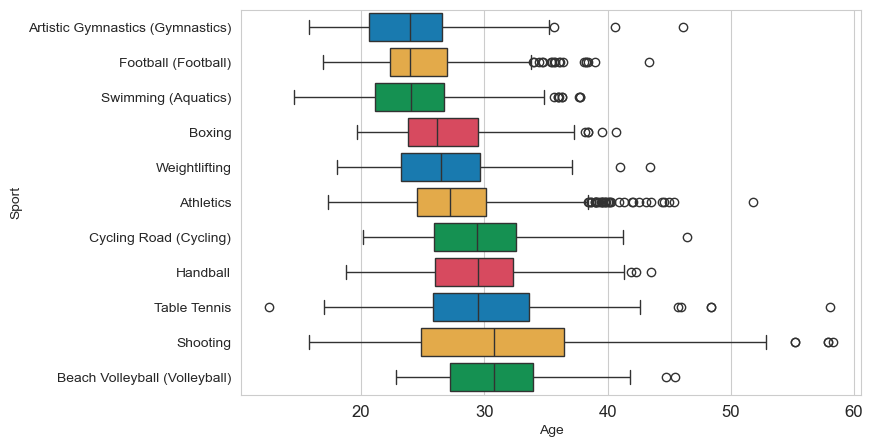

In [173]:
# Boxplot showing the age distribution for the 'physical' sports in the olympics 2020
plt.figure(figsize = (8,5))   # Figure size
sns.boxplot(df_2020,      # Dataframe
            x = 'age',    # x-axis feature
            y = 'discipline',  # y-axis feature
            order = order_age.index,   # Order by median age
            palette = no_black_palette) # Use the Olympic palette with black removed

# Axis labels and fonts
plt.xticks(fontsize = 'large')
plt.xlabel('Age')
plt.ylabel('Sport')

plt.savefig('2020 Olympics Age Boxplots.png', bbox_inches = 'tight')  # Save the visualisation
plt.show()

#### Average Age of Physical Sports 2020

**Young Average:** (Physical Individual Sports and Football)
- Artistic Gymnastics
    - High levels of agility and flexibility are most readily available in younger athletes.
    - This sport requires intense training which leads to early injuries and burnout.
- Swimming
    - The demands of swimming are often better suited to a younger, lighter physique.
- Football
    - The football data is skewed because the Men's teams are restricted to only 3 senior players (over 24).

**Old Average:** (Non-physical Sports and Physical Team Sports)
- Beach Volleyball
    - Players may have more longevity because of low impact on joints due to soft landing surface (sand).
    - Team sports such as Beach volleyball require a high level of game reading and strategic thinking which is developed over time with experience.
- Handball
    - Team sport that requires strategic thinking developed with experience.
- Cycling Road
    - Cycling is physically less taxing than other sports.
    - Road cycling requires endurance (athletes tend to build up endurance with accumulated training experience over time)

In my presentation I will explore the reasons between the difference in median age in more detail.

## Save the Updated Dataframes

In [500]:
# Save the updated dataframe to csv for future use
df_2020.to_csv('2020 Olympic athletes data.csv')

In [146]:
# Save df2 as a .csv
df2.to_csv('Updated Olympic Athletes Data.csv')